# Protecting our critical infrastructure


This Jupyter Notebook “Protecting our critical infrastructure” is based on the example of a nuclear power plant as a critical site. The presence of water and the evolution of its temperature is very important in its management. In order to observe the water and steam released by a power plant, we will make a time series over the year 2022. After that, we will take some significant images to be able to compare the evolution.

### Definition of parameters

In this notebook we will use the example of the Golfech power plant which is located along the Garonne river.

In [1]:
import datetime
import numpy as np
from giflib import download_images,generate_gif_from_folder, display_all_gif
from utils import height2width
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


_projection_ = 'EPSG:4326'
_bbox_       = (0.826979,44.090976,0.864658,44.122715) # Golfech nuclear power plant

_height_     = 512
_width_      = height2width(_bbox_, _height_)

## Time series with the library Mundi giflib

We will use the Sentinel-2 satellite to observe with natural colors the area as well as with the moisture index and color infared layers.

### Natural color

In [2]:
download_images(_bbox_,('Sentinel2', 'L1C'),'1_NATURAL_COL0R',datetime.date(2022, 1, 1),datetime.date(2022, 12, 22),'Natural','',30,_height_,_width_)

generate_gif_from_folder(5,"natural.gif",3)

GIF File Generated


### Color infared vegetation

In [3]:
download_images(_bbox_,('Sentinel2', 'L1C'),'2_COLOR_INFRARED__VEGETATION_',datetime.date(2022, 1, 1),datetime.date(2022, 12, 22),'Infared','',30,_height_,_width_)

generate_gif_from_folder(5,"infrared.gif",3)

GIF File Generated


### Moisture Index

In [4]:
download_images(_bbox_,('Sentinel2', 'L1C'),'6_MOISTURE_INDEX',datetime.date(2022, 1, 1),datetime.date(2022, 12, 22),'Moisture','',30,_height_,_width_)

generate_gif_from_folder(5,"moisture.gif",3)

GIF File Generated


#### Display gif files

In [5]:
display_all_gif()

## Use Mundi Web Map Service

In this section we will see how to visualise the state of the control unit on certain dates. In this way, we will be able to compare its operation when it is switched off and when it is in operation (full or half). We will use the same layers as before with Sentinel-2 and Landsat 8. 

In [6]:
from PIL import Image
from mundilib import MundiCatalogue
from matplotlib import pyplot as plt

### Define service end point

In [7]:
c = MundiCatalogue()
s2_wms = c.get_collection("Sentinel2").mundi_wms('L1C')
l8_wms = c.get_collection("Landsat8").mundi_wms('L2')

### Visualisation of WMS layers from bbox of Golfech

#### Sentinel-2

Natural color
2019-07-25
Reactors shut down


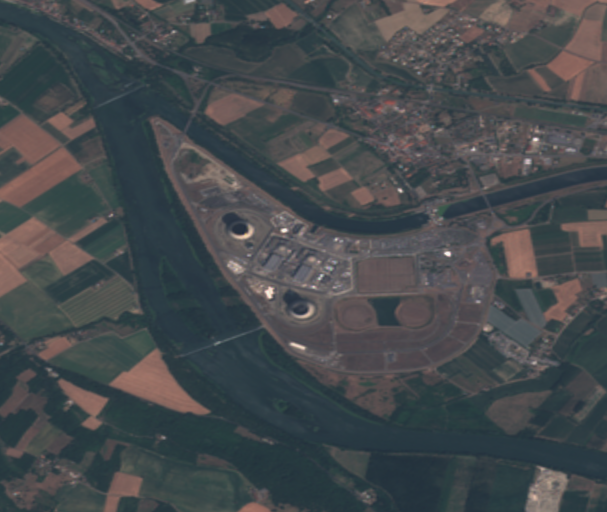

2022-08-08
One reactor in operation


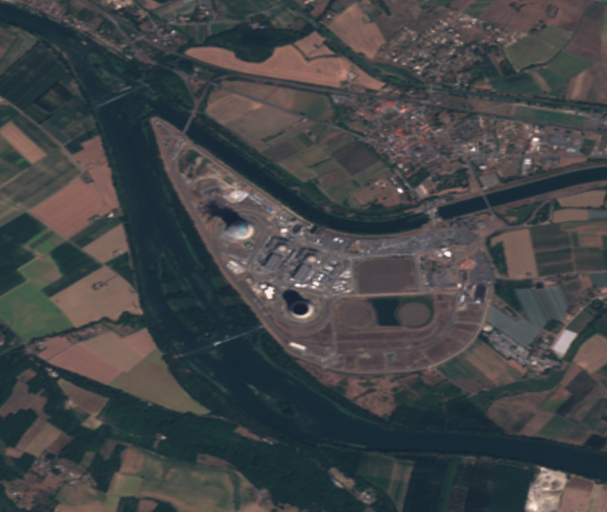

2022-08-13
One reactor in operation


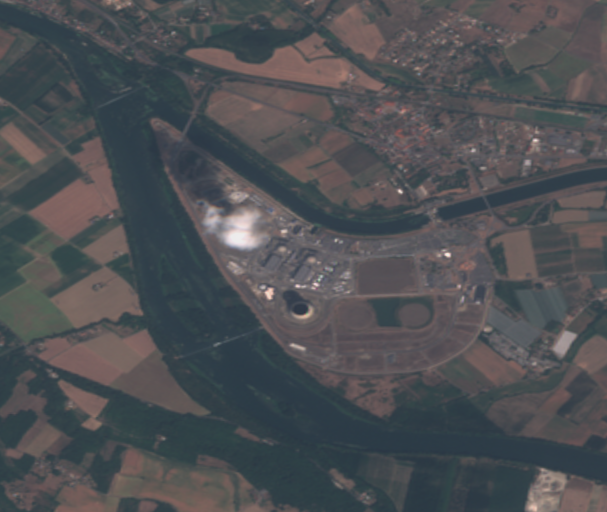

2022-02-09
Two reactors in operation


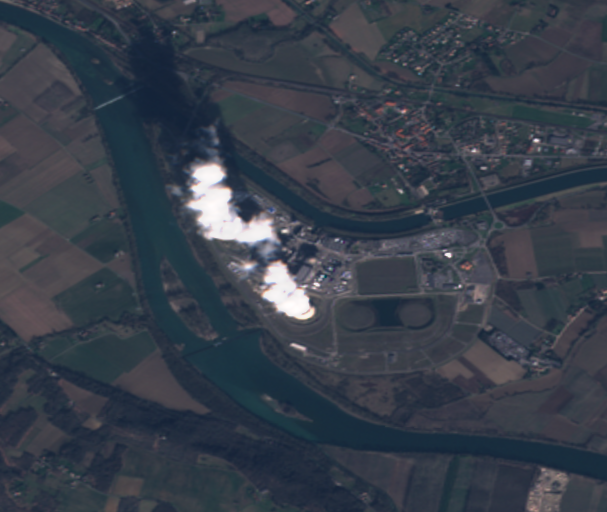

Color Infrared (vegetation)
2019-07-25
Reactors shut down


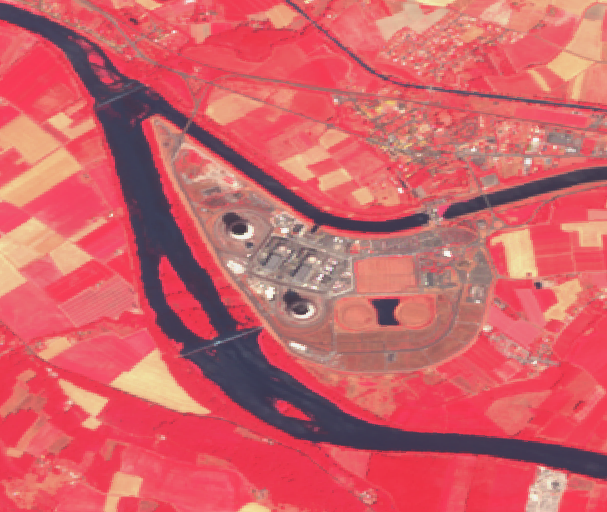

2022-08-08
One reactor in operation


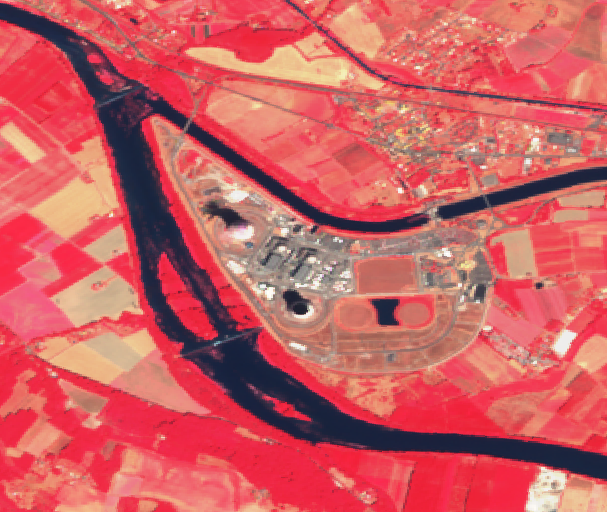

2022-08-13
One reactor in operation


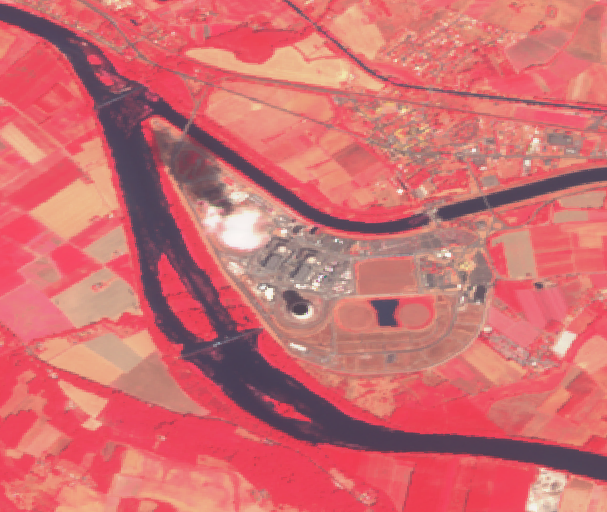

2022-02-09
Two reactors in operation


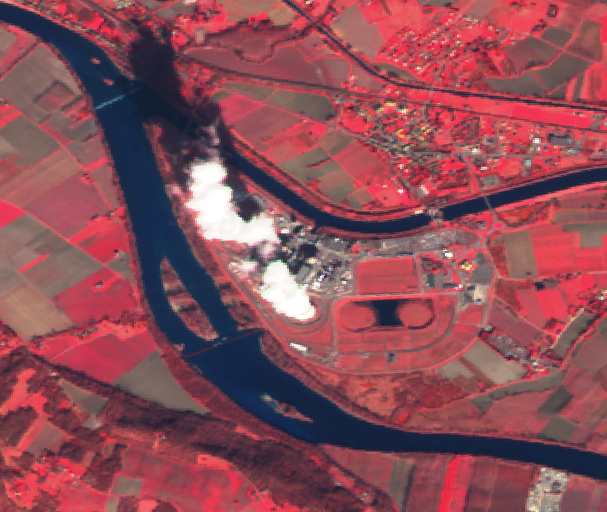

Moisture Index
2019-07-25
Reactors shut down


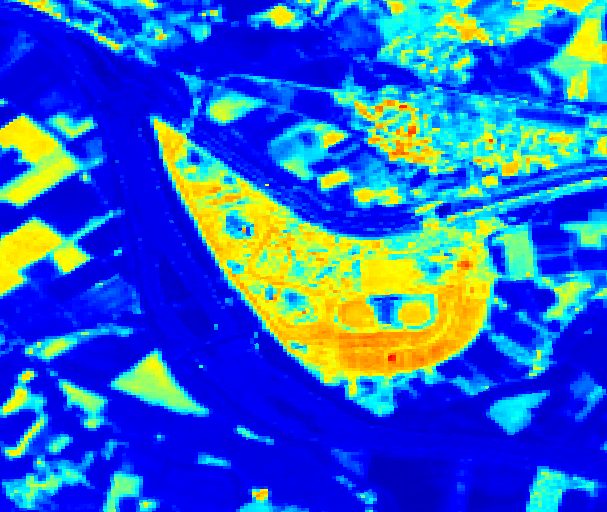

2022-08-08
One reactor in operation


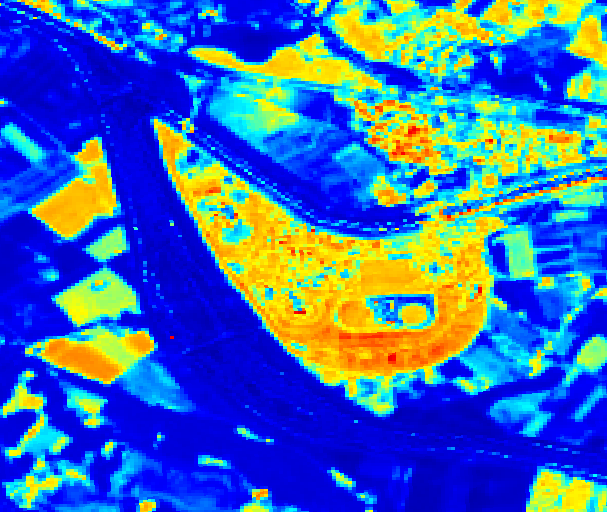

2022-08-13
One reactor in operation


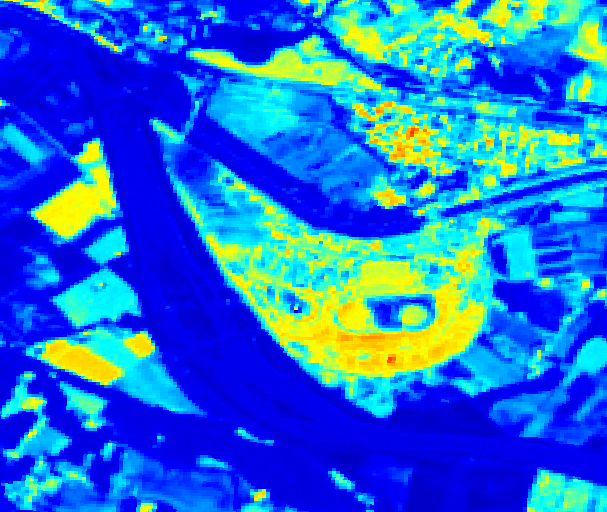

2022-02-09
Two reactors in operation


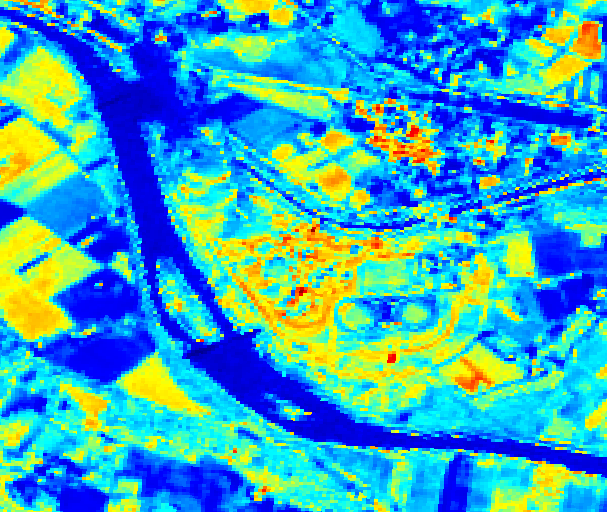

In [8]:
s2_layers = ['1_NATURAL_COL0R', '2_COLOR_INFRARED__VEGETATION_', '6_MOISTURE_INDEX']

_time_ = [('2019-07-25/2019-07-25','Reactors shut down'),('2022-08-08/2022-08-08','One reactor in operation'),
          ('2022-08-13/2022-08-13','One reactor in operation'),('2022-02-09/2022-02-09','Two reactors in operation')]

for lay in s2_layers:

    print (s2_wms[lay].title)

    for date in _time_:
        print(date[0][:10])
        print(date[1])
        
        # getting image from 'wms'
        img = s2_wms.getmap(layers = [s2_wms[lay].name],
                             srs = _projection_,
                             bbox = _bbox_,
                             size = (_width_, _height_),
                             format ='image/png',
                             time = date[0],
                             showlogo = False,
                             transparent=False)

        display(Image.open(img))


#### Landsat 8

TRUE_COLOR
2022-07-23
One reactor in operation


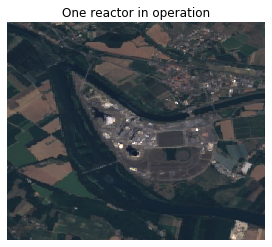

2022-08-13
One reactor in operation


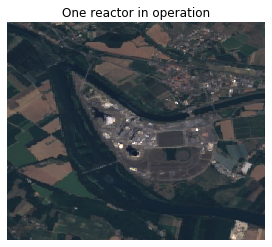

2022-02-10
Two reactors in operation


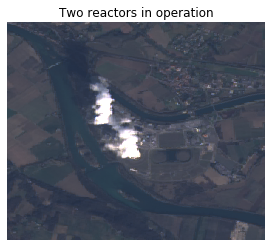

LST
2022-07-23
One reactor in operation


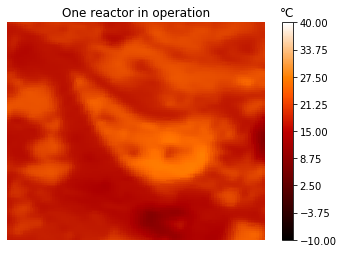

2022-08-13
One reactor in operation


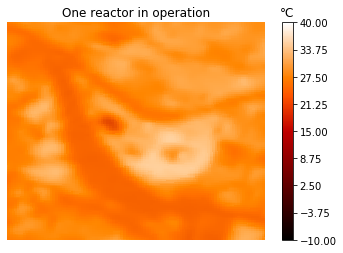

2022-02-10
Two reactors in operation


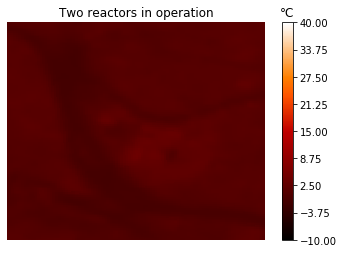

In [12]:
l8_layers = ['TRUE_COLOR','LST']
_time_ = [('2022-07-23','One reactor in operation'),('2022-08-13','One reactor in operation'),('2022-02-10','Two reactors in operation')]

for lay in l8_layers: 
    print (lay)

    for date in _time_:
    
        print(date[0])
        print(date[1])
    
        # getting image from 'wms'
        img = l8_wms.getmap(layers = [lay],
                             srs = _projection_,
                             bbox = _bbox_,
                             size = (_width_, _height_),
                             format ='image/png',
                             time = date[0],
                             showlogo = False,
                             transparent=False,
                             maxCC=100)
        
        lst_array = np.asarray(Image.open(img))
        plt.axis('off')
        plt.imshow(lst_array)
        plt.title(date[1])
        
        #Display the legend                       
        if lay == 'LST': 
            plt.axis('off')
            plt.imshow(lst_array, cmap='gist_heat')
            cbar = plt.colorbar()
            cbar.set_ticks([-10,-3.75,2.5,8.75,15,21.25,27.5,33.75,40])
            cbar.ax.set_title("°C")
            plt.clim(-10, 40)
        plt.show()